# Labolatorium nr 8

## Import bibliotek oraz ich konfiguracja

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import networkx as nx

# Matplotlib settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

## PageRank

In [91]:
# https://en.wikipedia.org/wiki/PageRank
def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    N = M.shape[1]
    v = np.ones(N) / N

    norm = []

    for i in range(num_iterations):
        last_v = v
        v = d * M @ v + (1 - d) / N
        this_norm = np.linalg.norm(v - last_v, ord=1)
        norm.append(this_norm)
        if this_norm < 1e-6:
            break

    return v, norm


def is_result_close(G, v):
    v_from_lib = nx.pagerank(G)
    v_from_lib = np.array([v_from_lib[i] for i in range(len(v_from_lib))])
    return np.allclose(v, v_from_lib, rtol=1e-03, atol=1e-03)

True
[0.02157332 0.00652529 0.00634214 0.0069018  0.00671495 0.00559476
 0.00615303 0.00577875 0.00634487 0.00615442 0.00690383 0.00652611
 0.00652689 0.005781   0.00634013 0.00615316 0.00634357 0.00503934
 0.00596793 0.00690259 0.00615554 0.00503568 0.00690268 0.0054145
 0.00596839 0.00577747 0.00634272 0.00652941 0.00615813 0.00541043
 0.00578318 0.0067159  0.00690135 0.00597132 0.00596652 0.00634391
 0.00652781 0.0070897  0.0061539  0.00596834 0.00522201 0.00633985
 0.00596701 0.00596745 0.00652865 0.00503866 0.00615419 0.00578381
 0.00615322 0.00578476 0.00708748 0.00578368 0.00522433 0.00559776
 0.00540836 0.00615366 0.00708923 0.00633806 0.00615553 0.00559057
 0.0061556  0.00615663 0.00634291 0.00652995 0.00671459 0.00615412
 0.00597198 0.00559318 0.00559531 0.02136404 0.02113442 0.0209242
 0.02072284 0.02032701 0.02028851 0.02008629 0.01985311 0.01948654
 0.01941269 0.0192202  0.01899938 0.01840198 0.01861774 0.01838202
 0.01813814 0.017949   0.01754884 0.01732412 0.01712084 0.0

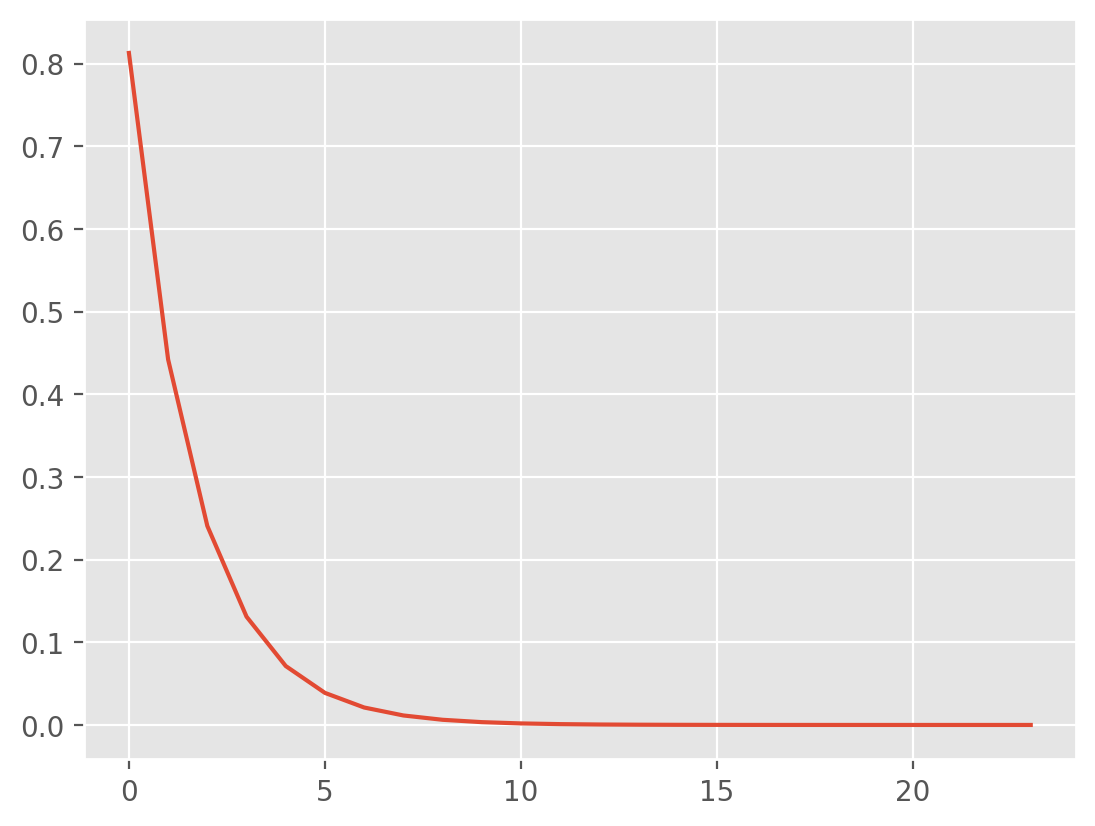

In [92]:
G=nx.barabasi_albert_graph(100,68)
M = nx.adjacency_matrix(nx.stochastic_graph(G.to_directed())).todense().T
v, norm= pagerank(M, 100, 0.85)

print(is_result_close(G, v))
print(v)

plt.plot(norm)

True


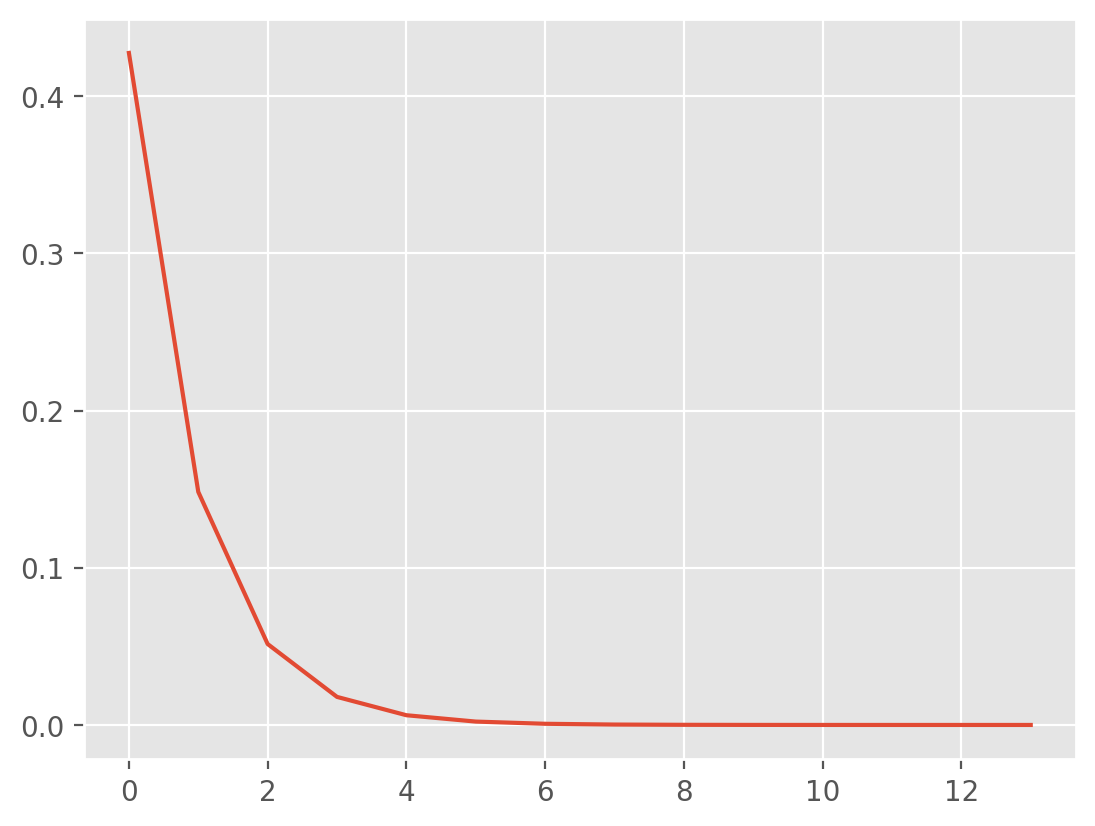

In [93]:
G=nx.barabasi_albert_graph(200,90)
M = nx.adjacency_matrix(nx.stochastic_graph(G.to_directed())).todense().T
v, norm= pagerank(M, 100, 0.85)

print(is_result_close(G, v))
# print(v)

plt.plot(norm)

True


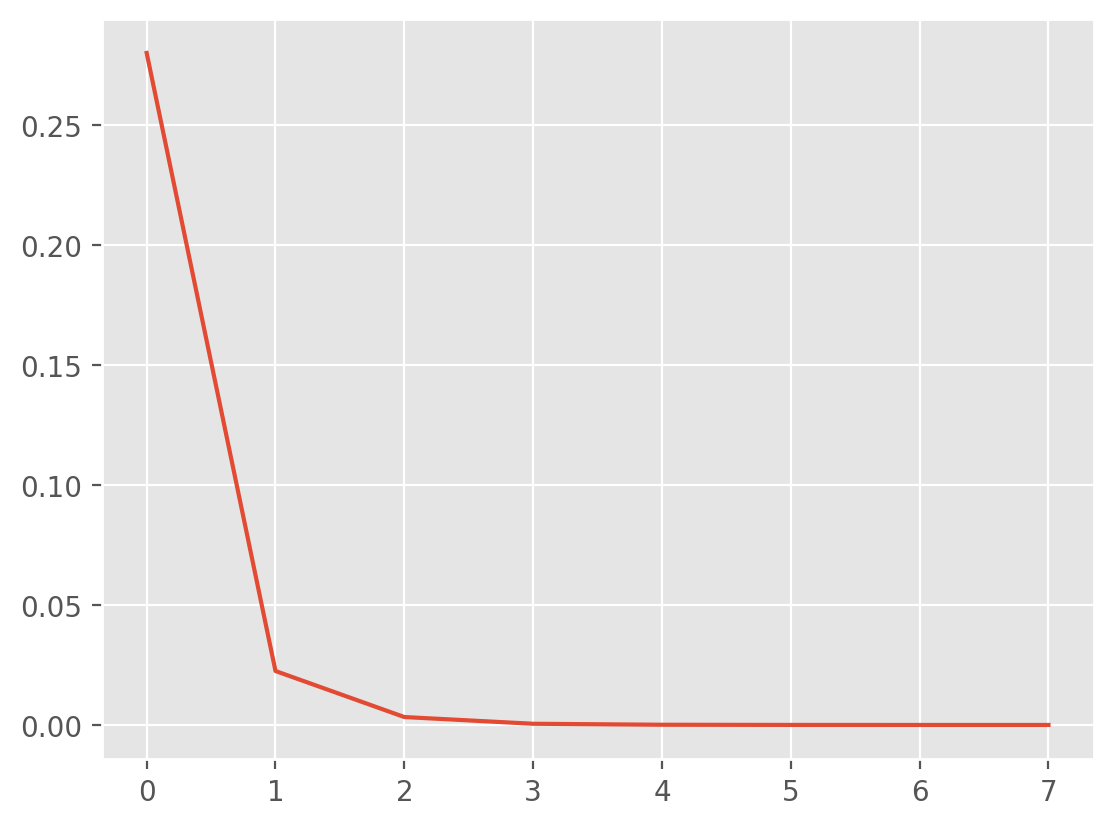

In [94]:
G=nx.barabasi_albert_graph(500,68)
M = nx.adjacency_matrix(nx.stochastic_graph(G.to_directed())).todense().T
v, norm= pagerank(M, 100, 0.85)

print(is_result_close(G, v))
# print(v)

plt.plot(norm)